# 1. Loading the Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("E_Commerce_Dataset.xlsx", sheet_name = "E Comm")
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

# 2. EDA

In [3]:
print("the dataset has " + str(df.shape[0]) + " rows")
print("the dataset has " + str(df.shape[1]) + " features")

the dataset has 5630 rows
the dataset has 20 features


In [4]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
CustomerID                     5630 non-null int64
Churn                          5630 non-null int64
Tenure                         5366 non-null float64
PreferredLoginDevice           5630 non-null object
CityTier                       5630 non-null int64
WarehouseToHome                5379 non-null float64
PreferredPaymentMode           5630 non-null object
Gender                         5630 non-null object
HourSpendOnApp                 5375 non-null float64
NumberOfDeviceRegistered       5630 non-null int64
PreferedOrderCat               5630 non-null object
SatisfactionScore              5630 non-null int64
MaritalStatus                  5630 non-null object
NumberOfAddress                5630 non-null int64
Complain                       5630 non-null int64
OrderAmountHikeFromlastYear    5365 non-null float64
CouponUsed                     5374 non-null float64
OrderCount 

In [6]:
cat = []
num = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [7]:
print("the numbe of categorical variables are " + str(len(cat)))
print(cat)

the numbe of categorical variables are 5
['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


In [8]:
print("The number of Numerical variables are " + str(len(num)))
print(num)

The number of Numerical variables are 15
['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PREFERREDLOGINDEVICE :  3
Phone           1231
Computer        1634
Mobile Phone    2765
Name: PreferredLoginDevice, dtype: int64


PREFERREDPAYMENTMODE :  7
Cash on Delivery     149
CC                   273
COD                  365
UPI                  414
E wallet             614
Credit Card         1501
Debit Card          2314
Name: PreferredPaymentMode, dtype: int64


GENDER :  2
Female    2246
Male      3384
Name: Gender, dtype: int64


PREFEREDORDERCAT :  6
Others                 264
Grocery                410
Mobile                 809
Fashion                826
Mobile Phone          1271
Laptop & Accessory    2050
Name: PreferedOrderCat, dtype: int64


MARITALSTATUS :  3
Divorced     848
Single      1796
Married     2986
Name: MaritalStatus, dtype: int64




In [10]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [13]:
948/4682

0.20247757368645877

# 3. Removing Unwanted Feature

In [14]:
df = df.drop('CustomerID', axis=1)

In [15]:
num.remove('CustomerID')

# 4. Imputing Missing Values

In [16]:
df = df.fillna(df.median())

In [17]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# 5. Univariate Analysis

In [18]:
num

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

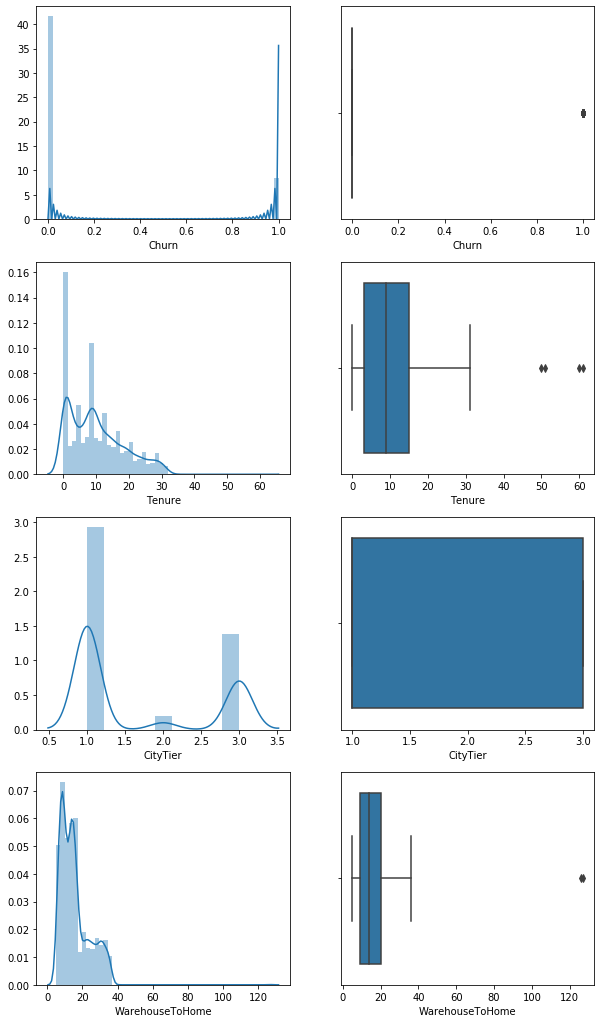

In [19]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['Churn'] , ax=axes[0][0])
a = sns.boxplot(df['Churn'] , ax=axes[0][1])

a = sns.distplot(df['Tenure'], ax=axes[1][0])
a = sns.boxplot(df['Tenure'] , ax=axes[1][1])

a = sns.distplot(df['CityTier'] , ax=axes[2][0])
a = sns.boxplot(df['CityTier'] , ax=axes[2][1])

a = sns.distplot(df['WarehouseToHome'] , ax=axes[3][0])
a = sns.boxplot(df['WarehouseToHome'] , ax=axes[3][1])
plt.show()

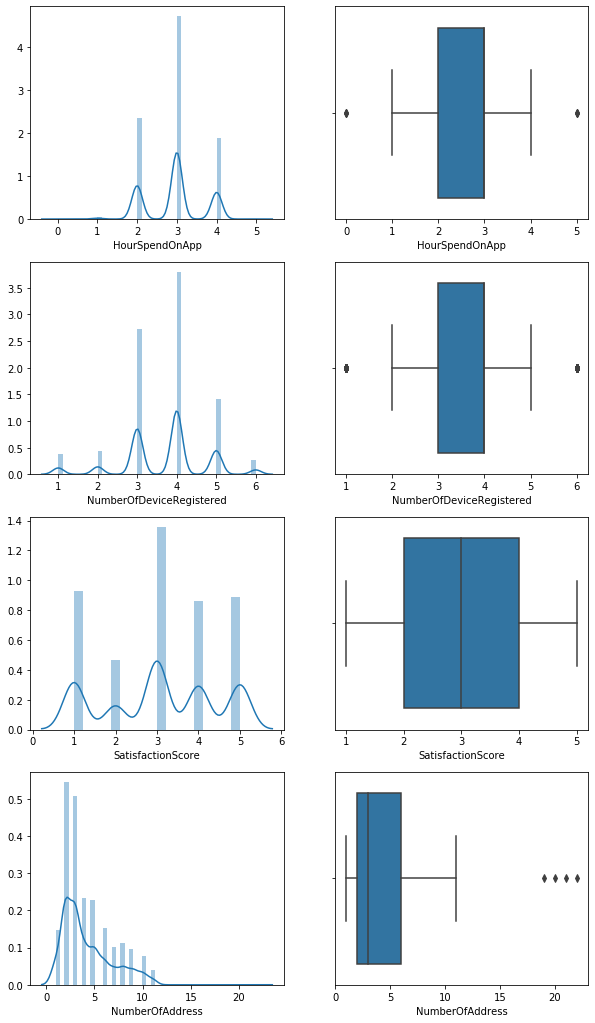

In [20]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(10,18)

a = sns.distplot(df['HourSpendOnApp'], ax = axes[0][0])
a = sns.boxplot(df['HourSpendOnApp'], ax = axes[0][1])

a = sns.distplot(df['NumberOfDeviceRegistered'], ax=axes[1][0])
a = sns.boxplot(df['NumberOfDeviceRegistered'], ax=axes[1][1])

a = sns.distplot(df['SatisfactionScore'], ax = axes[2][0])
a = sns.boxplot(df['SatisfactionScore'], ax = axes[2][1])

a = sns.distplot(df['NumberOfAddress'], ax = axes[3][0])
a = sns.boxplot(df['NumberOfAddress'], ax = axes[3][1])

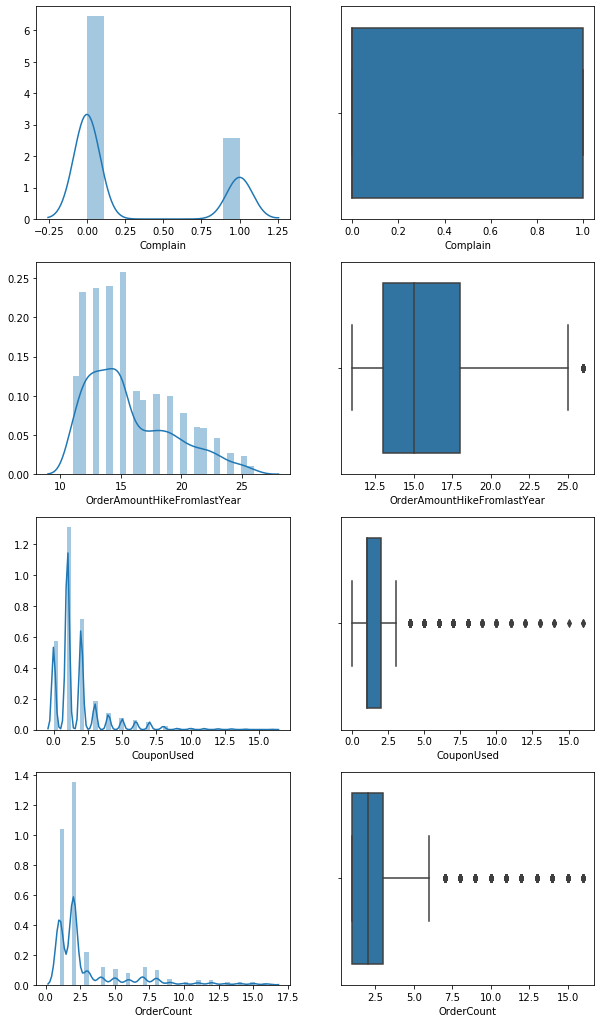

In [21]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(10,18)

a = sns.distplot(df['Complain'], ax = axes[0][0])
a = sns.boxplot(df['Complain'], ax = axes[0][1])

a = sns.distplot(df['OrderAmountHikeFromlastYear'], ax=axes[1][0])
a = sns.boxplot(df['OrderAmountHikeFromlastYear'], ax=axes[1][1])

a = sns.distplot(df['CouponUsed'], ax = axes[2][0])
a = sns.boxplot(df['CouponUsed'], ax = axes[2][1])

a = sns.distplot(df['OrderCount'], ax = axes[3][0])
a = sns.boxplot(df['OrderCount'], ax = axes[3][1])

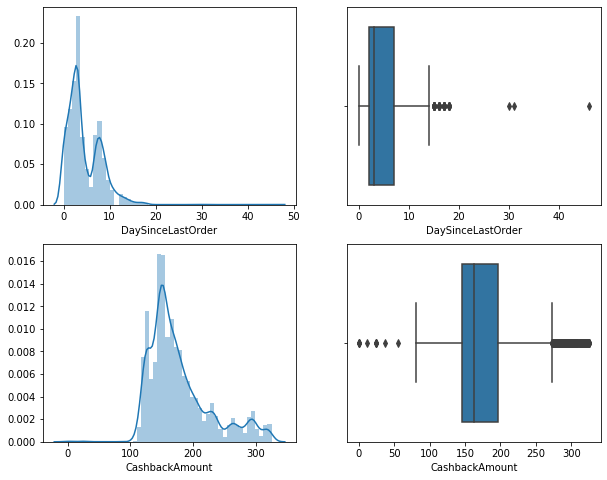

In [22]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(10,8)

a = sns.distplot(df['DaySinceLastOrder'], ax = axes[0][0])
a = sns.boxplot(df['DaySinceLastOrder'], ax = axes[0][1])

a = sns.distplot(df['CashbackAmount'], ax=axes[1][0])
a = sns.boxplot(df['CashbackAmount'], ax=axes[1][1])

In [23]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

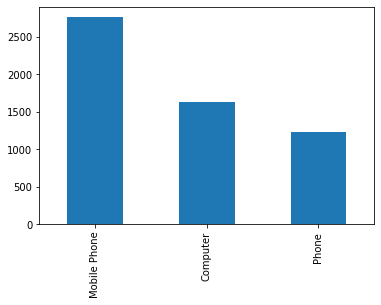

In [24]:
df['PreferredLoginDevice'].value_counts().plot(kind='bar')

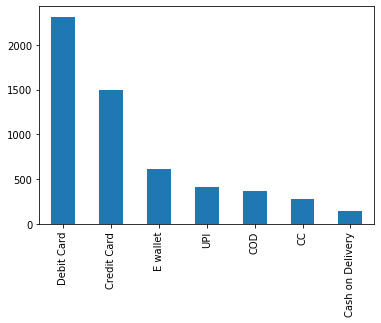

In [25]:
df['PreferredPaymentMode'].value_counts().plot(kind='bar')

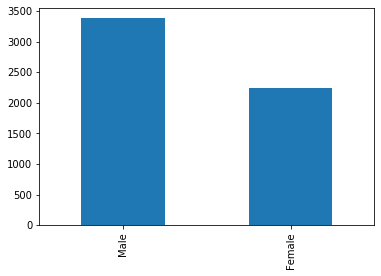

In [26]:
df['Gender'].value_counts().plot(kind='bar')

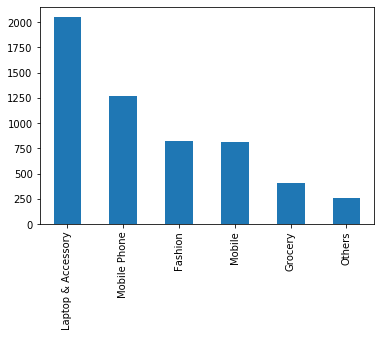

In [27]:
df['PreferedOrderCat'].value_counts().plot(kind='bar')

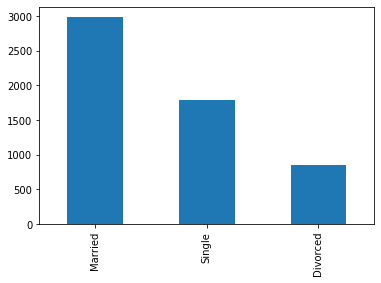

In [28]:
df['MaritalStatus'].value_counts().plot(kind='bar')

# 6. Bivariate Analysis (Swarmplots, Boxplots, Violin Plots)

In [24]:
num

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

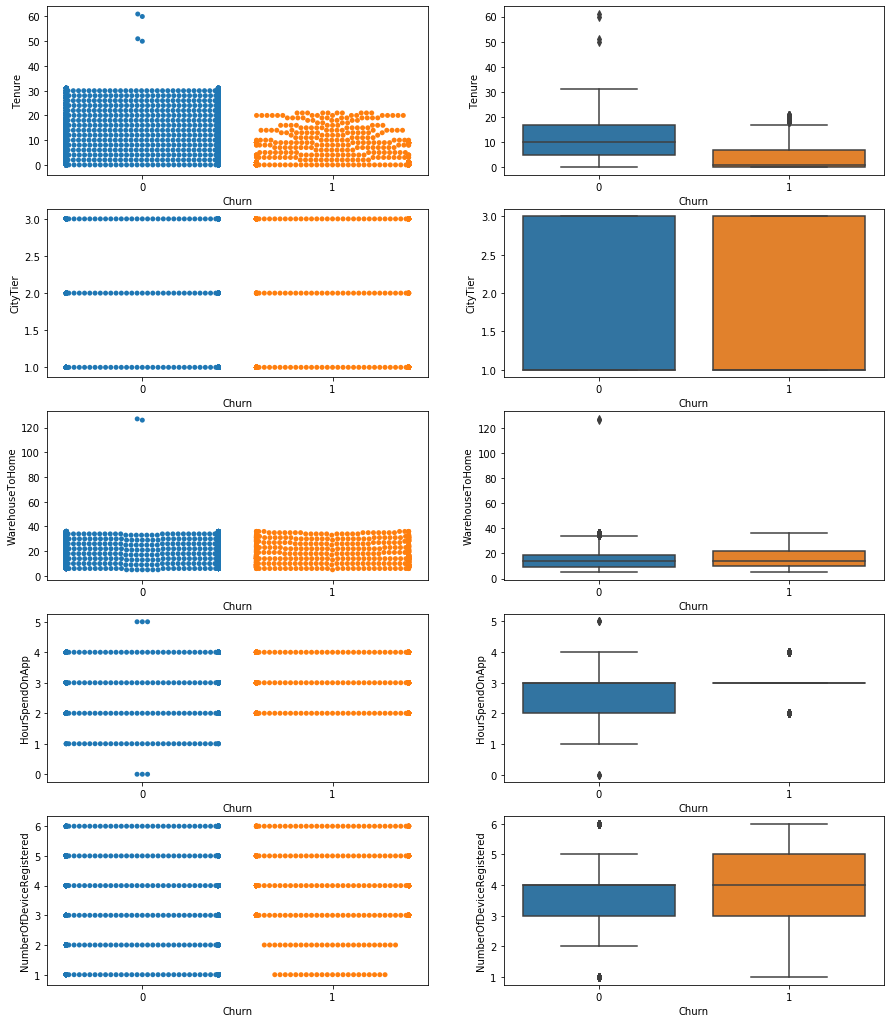

In [26]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
fig.set_size_inches(15,18)

a = sns.swarmplot(df['Churn'], df['Tenure'],ax = axes[0][0])
a = sns.boxplot(df['Churn'], df['Tenure'],ax = axes[0][1])

a = sns.swarmplot(df['Churn'], df['CityTier'],ax = axes[1][0])
a = sns.boxplot(df['Churn'], df['CityTier'],ax = axes[1][1])

a = sns.swarmplot(df['Churn'], df['WarehouseToHome'],ax = axes[2][0])
a = sns.boxplot(df['Churn'], df['WarehouseToHome'],ax = axes[2][1])

a = sns.swarmplot(df['Churn'], df['HourSpendOnApp'],ax = axes[3][0])
a = sns.boxplot(df['Churn'], df['HourSpendOnApp'],ax = axes[3][1])

a = sns.swarmplot(df['Churn'], df['NumberOfDeviceRegistered'],ax = axes[4][0])
a = sns.boxplot(df['Churn'], df['NumberOfDeviceRegistered'],ax = axes[4][1])

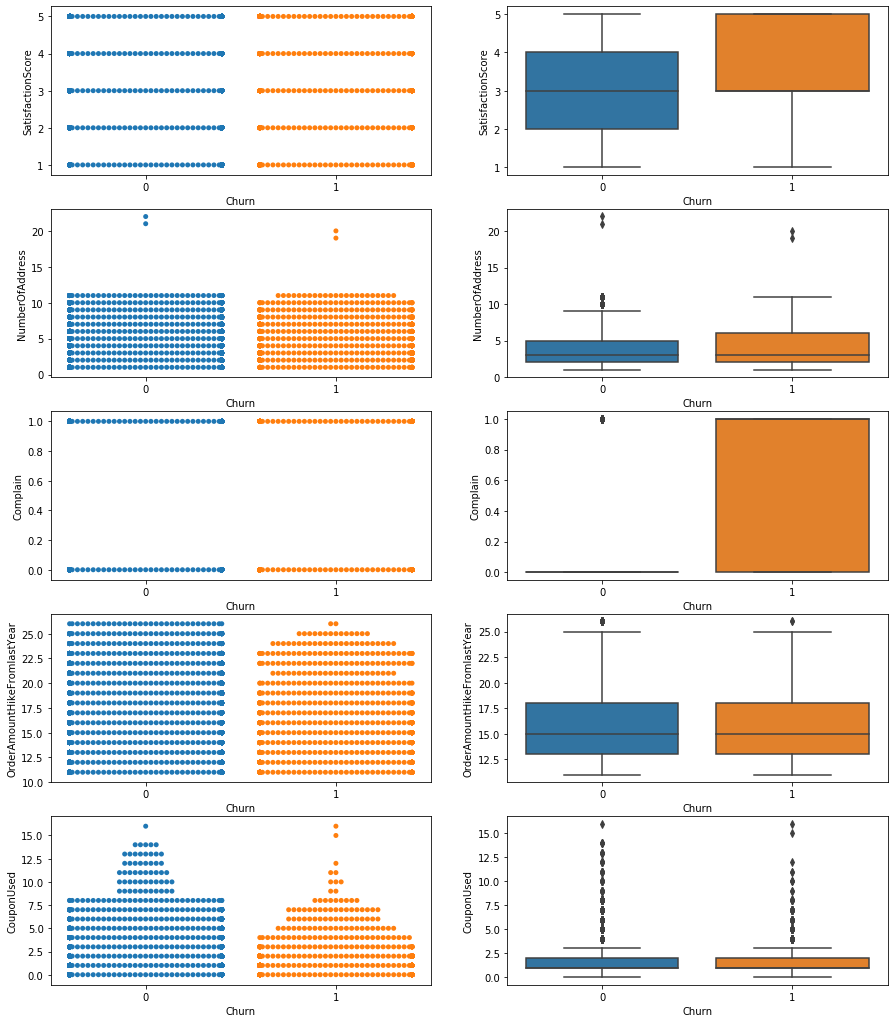

In [27]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
fig.set_size_inches(15,18)

a = sns.swarmplot(df['Churn'], df['SatisfactionScore'],ax = axes[0][0])
a = sns.boxplot(df['Churn'], df['SatisfactionScore'],ax = axes[0][1])

a = sns.swarmplot(df['Churn'], df['NumberOfAddress'],ax = axes[1][0])
a = sns.boxplot(df['Churn'], df['NumberOfAddress'],ax = axes[1][1])

a = sns.swarmplot(df['Churn'], df['Complain'],ax = axes[2][0])
a = sns.boxplot(df['Churn'], df['Complain'],ax = axes[2][1])

a = sns.swarmplot(df['Churn'], df['OrderAmountHikeFromlastYear'],ax = axes[3][0])
a = sns.boxplot(df['Churn'], df['OrderAmountHikeFromlastYear'],ax = axes[3][1])

a = sns.swarmplot(df['Churn'], df['CouponUsed'],ax = axes[4][0])
a = sns.boxplot(df['Churn'], df['CouponUsed'],ax = axes[4][1])

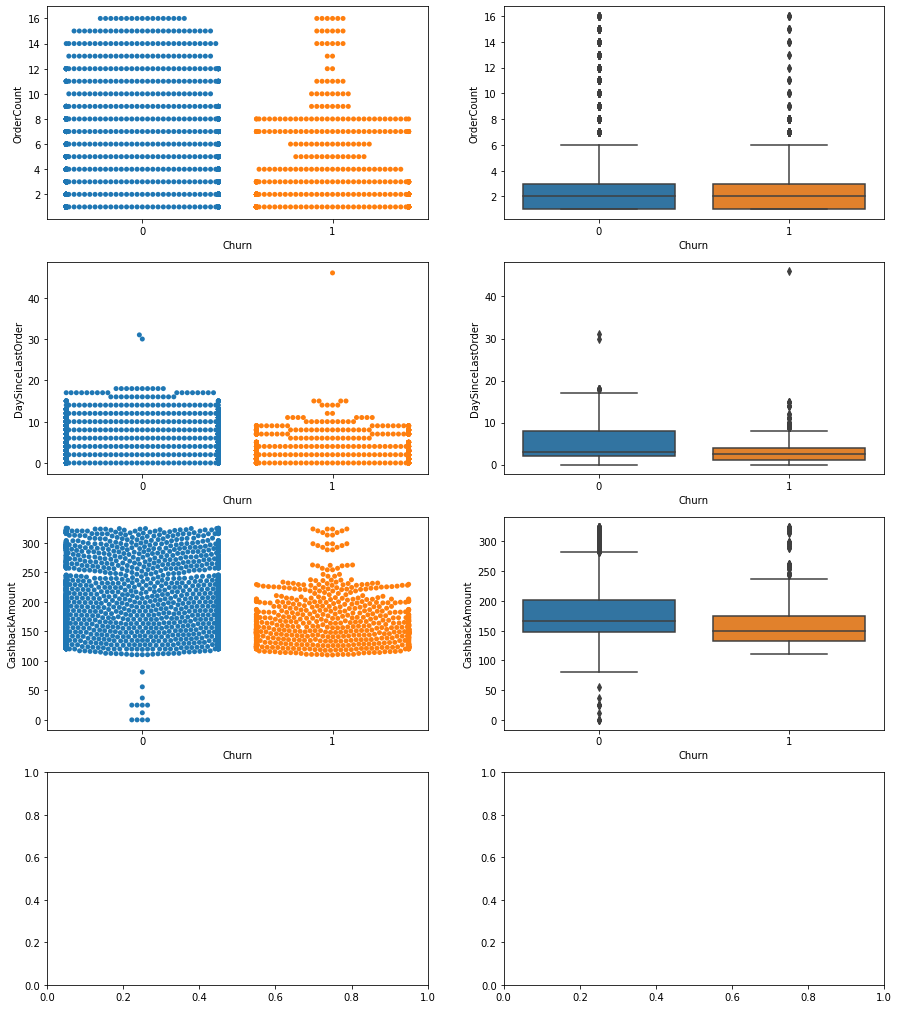

In [28]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(15,18)

a = sns.swarmplot(df['Churn'], df['OrderCount'],ax = axes[0][0])
a = sns.boxplot(df['Churn'], df['OrderCount'],ax = axes[0][1])

a = sns.swarmplot(df['Churn'], df['DaySinceLastOrder'],ax = axes[1][0])
a = sns.boxplot(df['Churn'], df['DaySinceLastOrder'],ax = axes[1][1])

a = sns.swarmplot(df['Churn'], df['CashbackAmount'],ax = axes[2][0])
a = sns.boxplot(df['Churn'], df['CashbackAmount'],ax = axes[2][1])

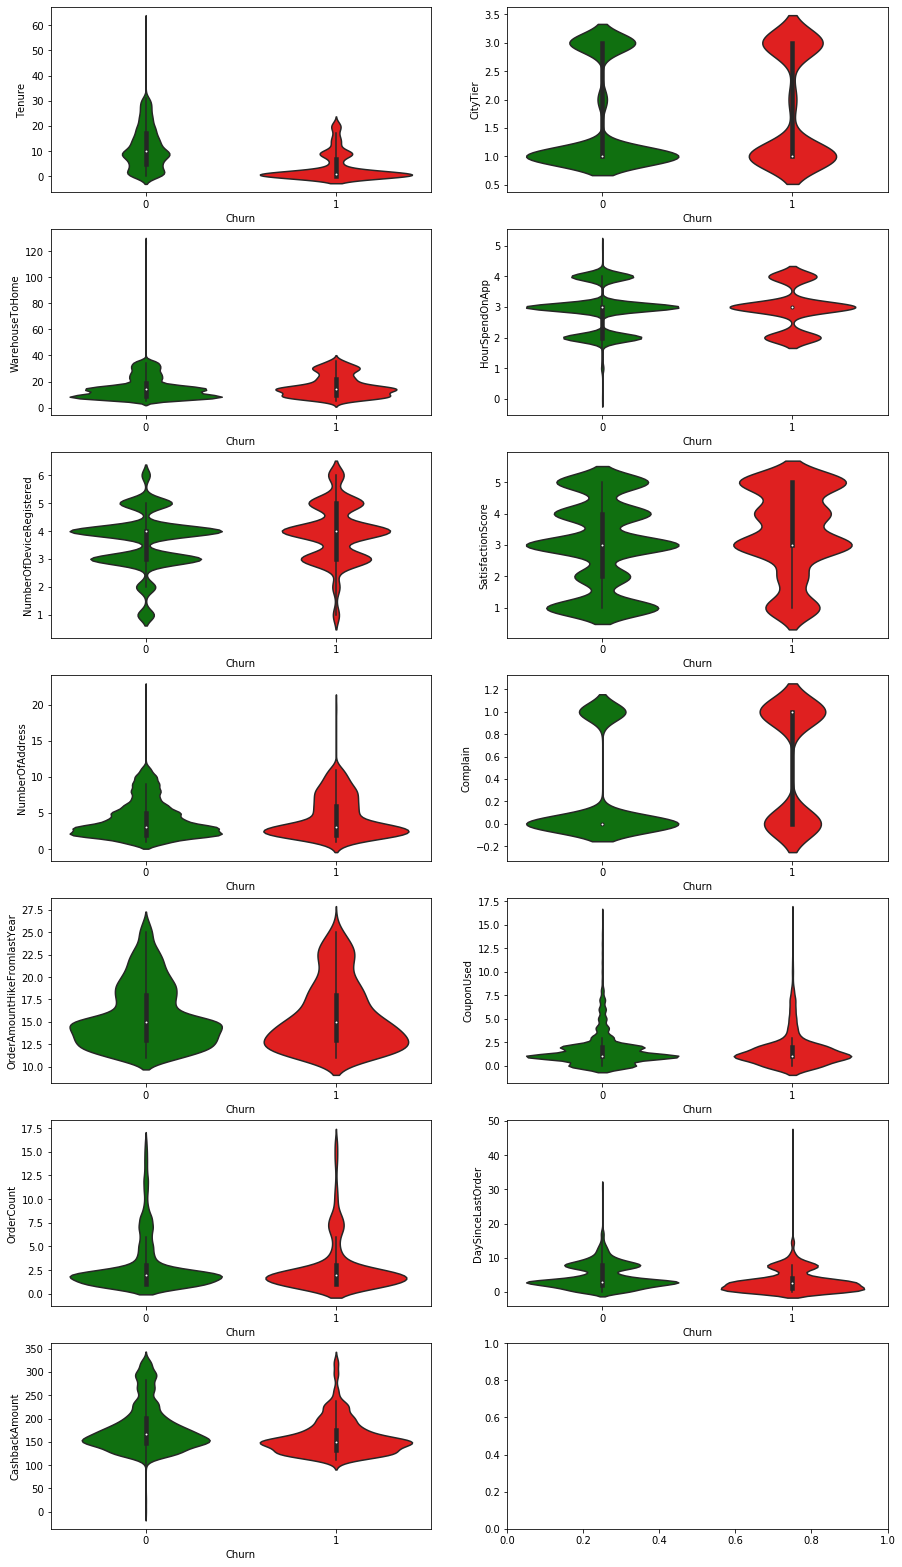

In [29]:
fig, axes = plt.subplots(nrows = 7, ncols = 2)
fig.set_size_inches(15,28)

#my_pal = {Churn: "red" if Churn == "1" else "green" for Churn in df.Churn.unique()}

a = sns.violinplot(df['Churn'], df['Tenure'],ax = axes[0][0], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['CityTier'],ax = axes[0][1], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['WarehouseToHome'],ax = axes[1][0], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['HourSpendOnApp'],ax = axes[1][1], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['NumberOfDeviceRegistered'],ax = axes[2][0], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['SatisfactionScore'],ax = axes[2][1], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['NumberOfAddress'],ax = axes[3][0], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['Complain'],ax = axes[3][1], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['OrderAmountHikeFromlastYear'],ax = axes[4][0], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['CouponUsed'],ax = axes[4][1], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['OrderCount'],ax = axes[5][0], palette =['g','r'])
a = sns.violinplot(df['Churn'], df['DaySinceLastOrder'],ax = axes[5][1], palette =['g','r'])
a = sns.violinplot(x=df['Churn'], y=df['CashbackAmount'],ax = axes[6][0], palette =['g','r'])

In [30]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

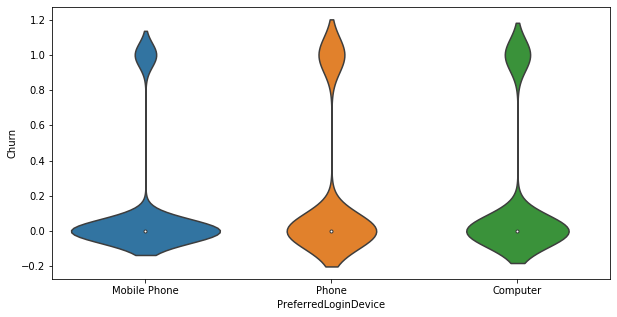

In [31]:
plt.figure(figsize = (10,5))
sns.violinplot(df['PreferredLoginDevice'],df['Churn'])

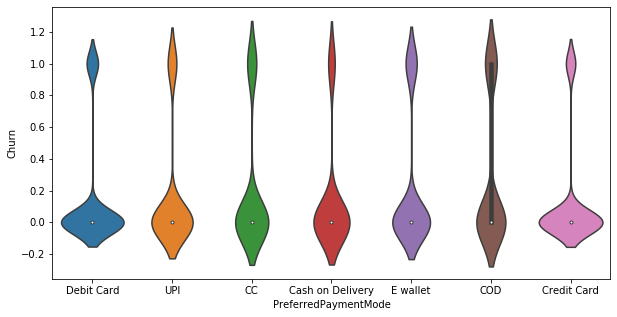

In [32]:
plt.figure(figsize = (10,5))
sns.violinplot(df['PreferredPaymentMode'],df['Churn'])

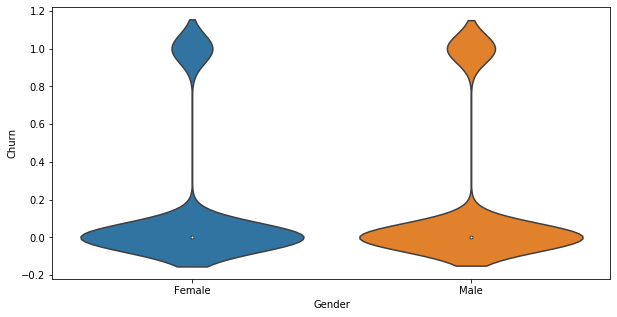

In [33]:
plt.figure(figsize = (10,5))
sns.violinplot(df['Gender'],df['Churn'])

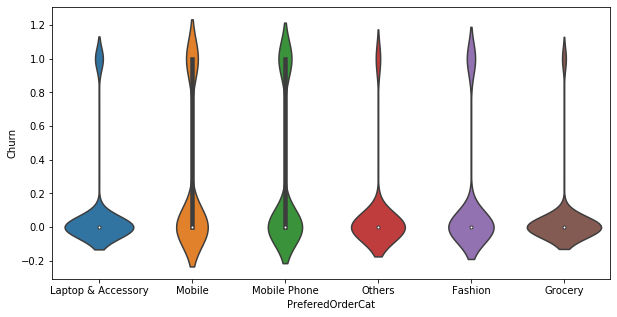

In [34]:
plt.figure(figsize = (10,5))
sns.violinplot(df['PreferedOrderCat'],df['Churn'])

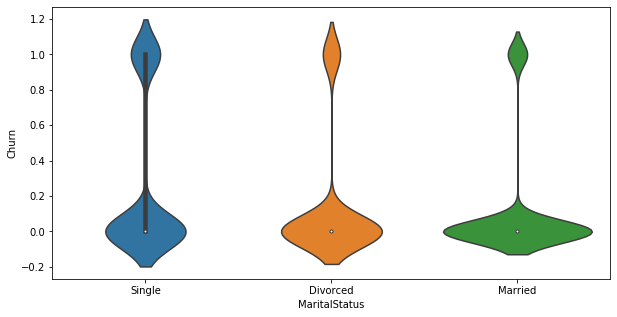

In [35]:
plt.figure(figsize = (10,5))
sns.violinplot(df['MaritalStatus'],df['Churn'])

# 7. Multivariate Analysis

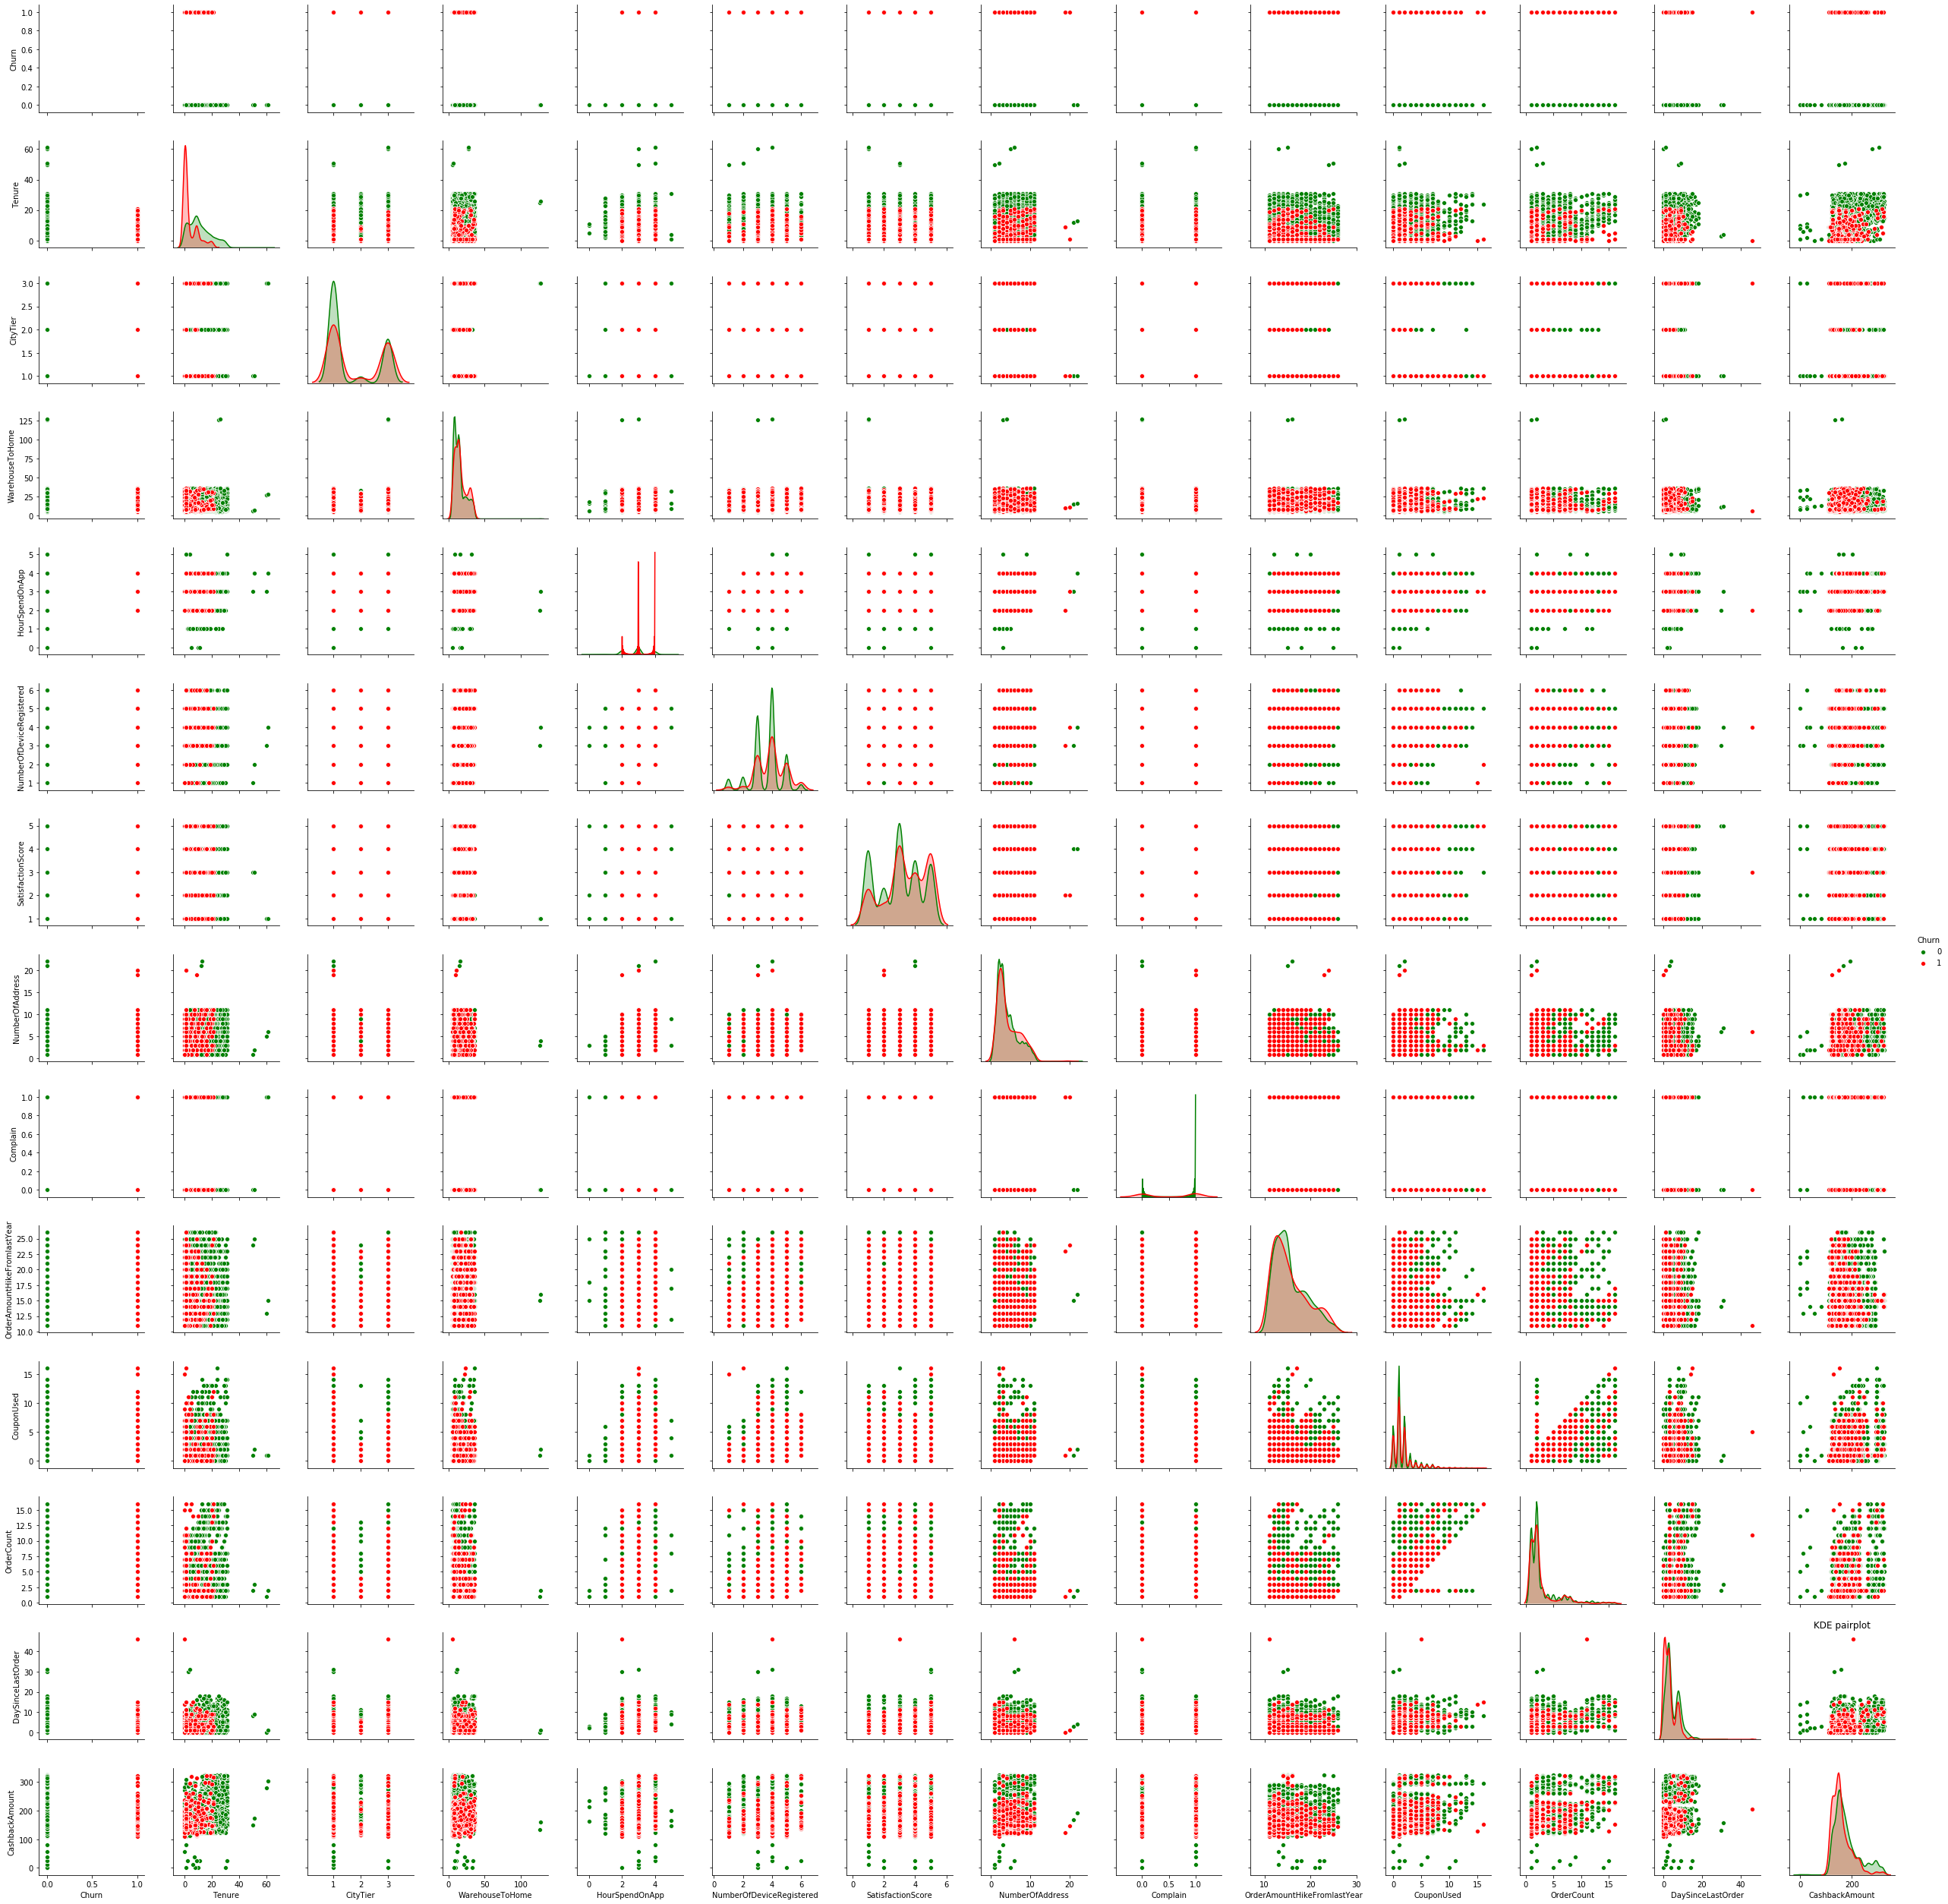

In [44]:
sns.pairplot(df, hue='Churn', palette =['g','r'])
plt.title("KDE pairplot")
plt.savefig(" KDE_Pairplot.jpg")

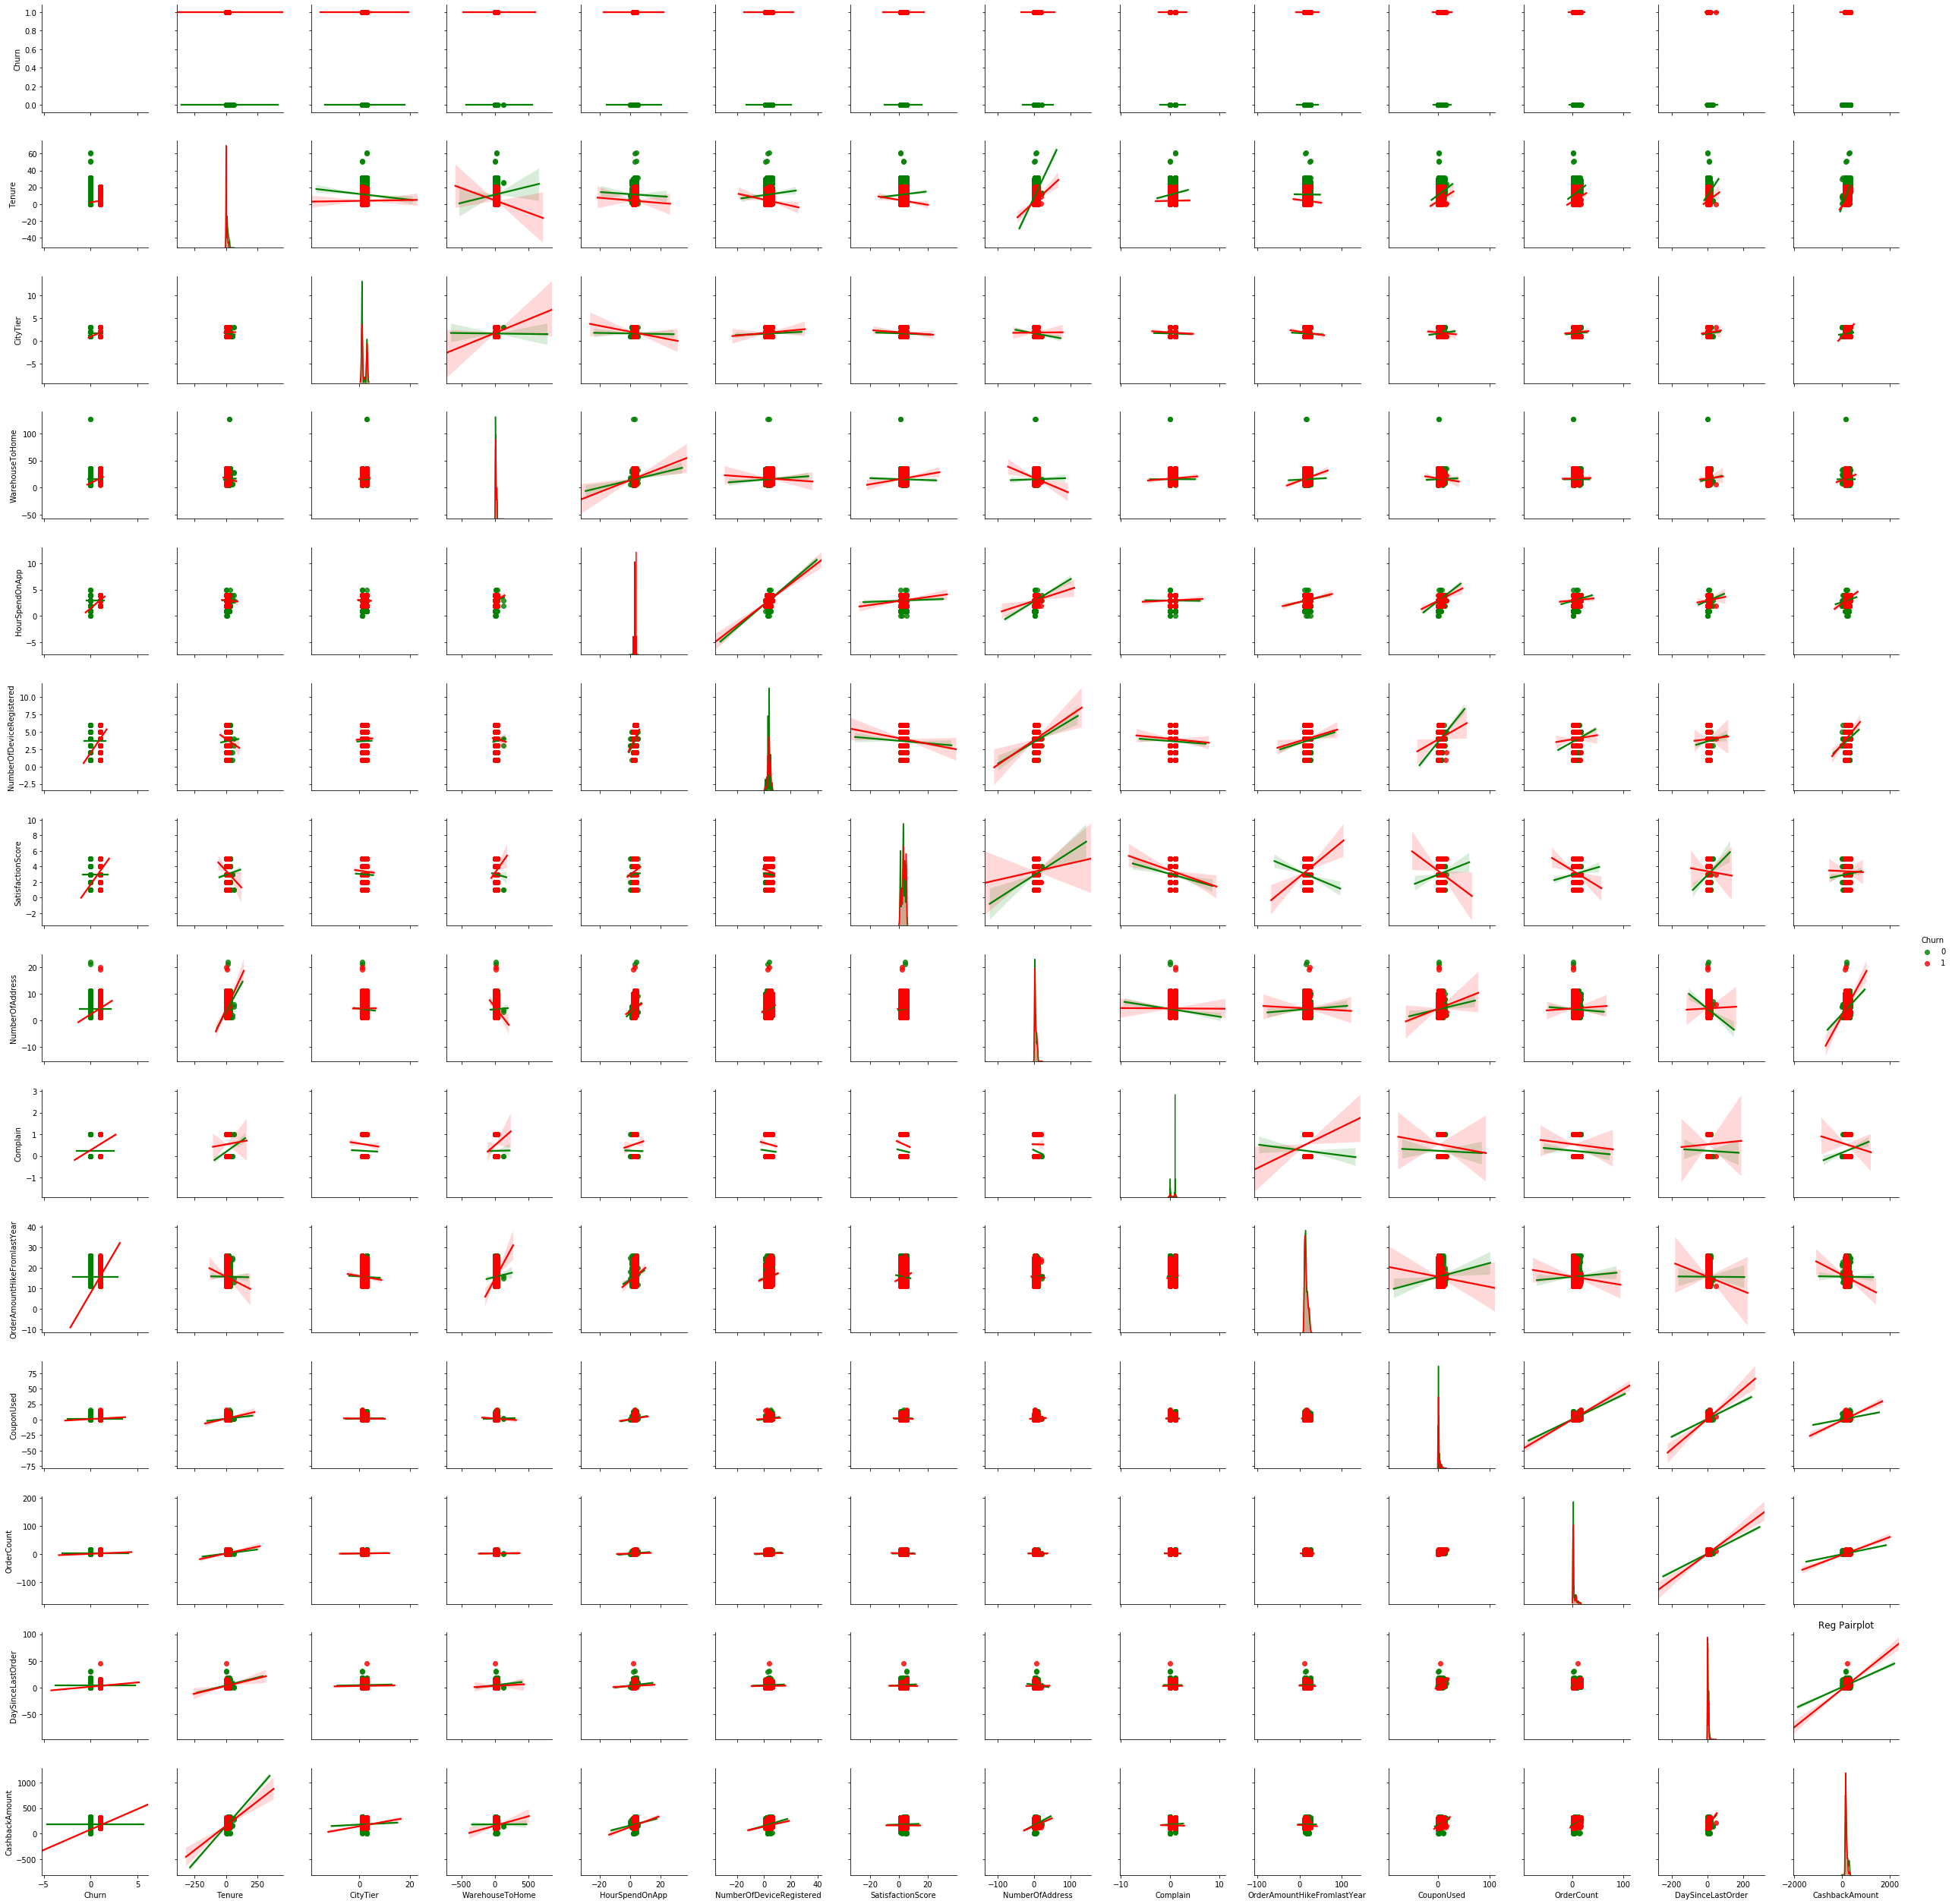

In [45]:
sns.pairplot(df, kind='reg', hue ='Churn', palette =['g','r'])
plt.title("Reg Pairplot")
plt.savefig("Regression_Pairplot.jpg")

In [36]:
df.corr()

Churn    Tenure  CityTier  WarehouseToHome  \
Churn                        1.000000 -0.337831  0.084703         0.069544   
Tenure                      -0.337831  1.000000 -0.057895        -0.012191   
CityTier                     0.084703 -0.057895  1.000000         0.013576   
WarehouseToHome              0.069544 -0.012191  0.013576         1.000000   
HourSpendOnApp               0.018816 -0.017282 -0.009921         0.064069   
NumberOfDeviceRegistered     0.107939 -0.020657  0.027934         0.023020   
SatisfactionScore            0.105481 -0.014452 -0.011554         0.007524   
NumberOfAddress              0.043931  0.235076 -0.029440        -0.008305   
Complain                     0.250188 -0.020535  0.003375         0.026825   
OrderAmountHikeFromlastYear -0.007075 -0.005542 -0.028890         0.038311   
CouponUsed                  -0.001430  0.101535  0.022629         0.002675   
OrderCount                  -0.024038  0.165339  0.033551         0.000354   
DaySinceLastOrder           -0.155871  0.174378  0.010214         0.020253   
CashbackAmount              -0.154118  0.467986  0.055746         0.000415   

                             HourSpendOnApp  NumberOfDeviceRegistered  \
Churn                              0.018816                  0.107939   
Tenure                            -0.017282                 -0.020657   
CityTier                          -0.009921                  0.027934   
WarehouseToHome                    0.064069                  0.023020   
HourSpendOnApp                     1.000000                  0.305048   
NumberOfDeviceRegistered           0.305048                  1.000000   
SatisfactionScore                  0.030937                 -0.017228   
NumberOfAddress                    0.139541                  0.084997   
Complain                           0.006607                  0.003407   
OrderAmountHikeFromlastYear        0.099305                  0.065714   
CouponUsed                         0.187166                  0.152065   
OrderCount                         0.102053                  0.099790   
DaySinceLastOrder                  0.061213                  0.007350   
CashbackAmount                     0.114286                  0.137183   

                             SatisfactionScore  NumberOfAddress  Complain  \
Churn                                 0.105481         0.043931  0.250188   
Tenure                               -0.014452         0.235076 -0.020535   
CityTier                             -0.011554        -0.029440  0.003375   
WarehouseToHome                       0.007524        -0.008305  0.026825   
HourSpendOnApp                        0.030937         0.139541  0.006607   
NumberOfDeviceRegistered             -0.017228         0.084997  0.003407   
SatisfactionScore                     1.000000         0.053583 -0.031115   
NumberOfAddress                       0.053583         1.000000 -0.026399   
Complain                             -0.031115        -0.026399  1.000000   
OrderAmountHikeFromlastYear          -0.027121         0.012161 -0.003842   
CouponUsed                            0.017423         0.036985 -0.007810   
OrderCount                            0.018166        -0.013970 -0.021288   
DaySinceLastOrder                     0.031985        -0.067180 -0.041415   
CashbackAmount                        0.003473         0.186688  0.000525   

                             OrderAmountHikeFromlastYear  CouponUsed  \
Churn                                          -0.007075   -0.001430   
Tenure                                         -0.005542    0.101535   
CityTier                                       -0.028890    0.022629   
WarehouseToHome                                 0.038311    0.002675   
HourSpendOnApp                                  0.099305    0.187166   
NumberOfDeviceRegistered                        0.065714    0.152065   
SatisfactionScore                              -0.027121    0.017423   
NumberOfAddress                  

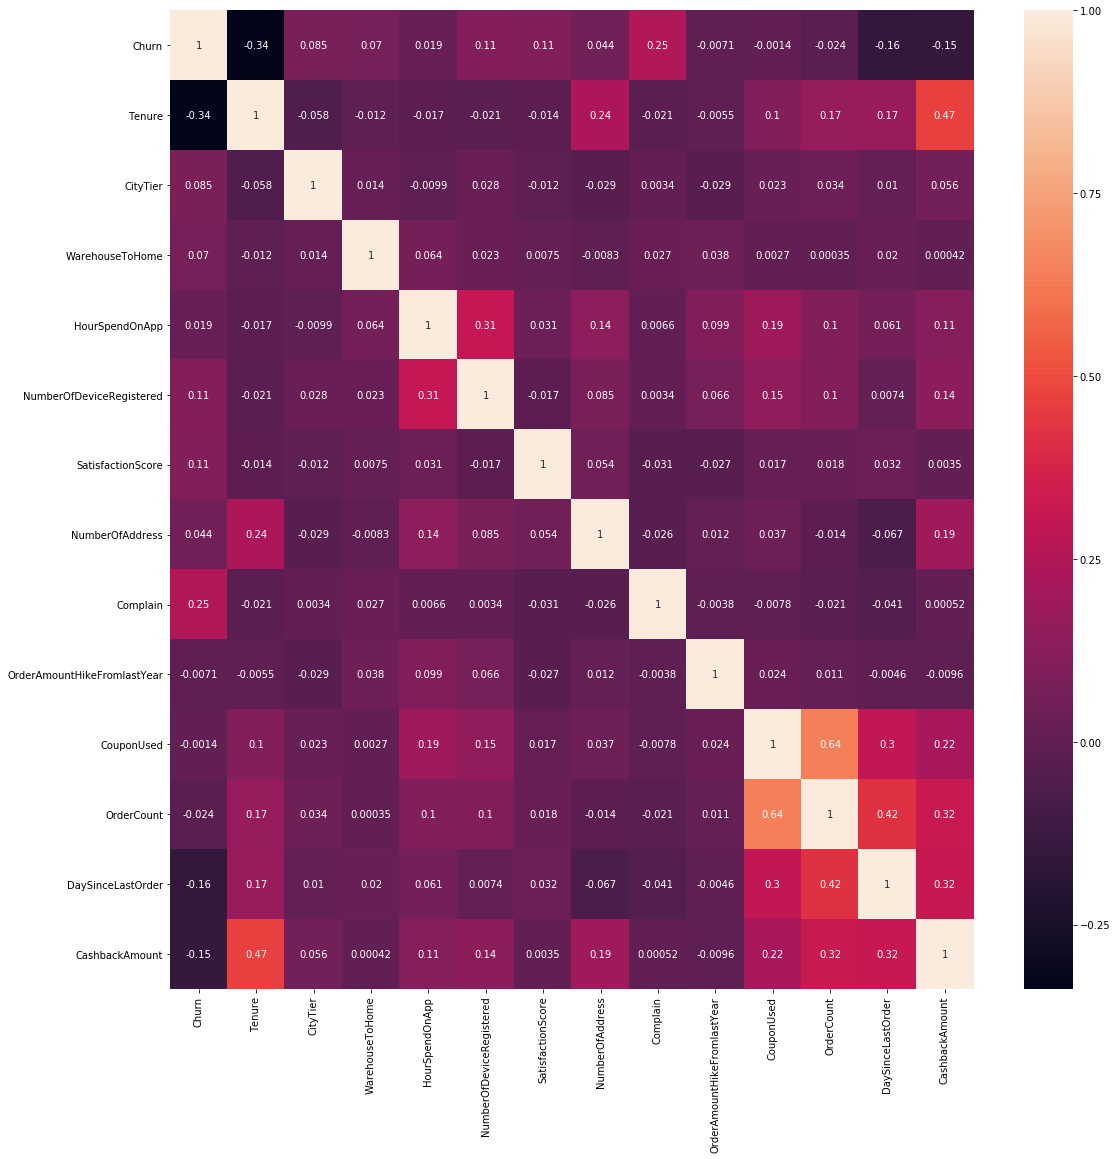

In [37]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)
plt.savefig("heatmap_Eda.jpg")

In [38]:
df.skew()

Churn                          1.772843
Tenure                         0.773278
CityTier                       0.735326
WarehouseToHome                1.678346
HourSpendOnApp                -0.040982
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                1.088639
Complain                       0.953347
OrderAmountHikeFromlastYear    0.835439
CouponUsed                     2.630035
OrderCount                     2.276640
DaySinceLastOrder              1.273530
CashbackAmount                 1.149846
dtype: float64

In [39]:
df.kurt()

Churn                           1.143377
Tenure                          0.154613
CityTier                       -1.401529
WarehouseToHome                10.606302
HourSpendOnApp                 -0.557728
NumberOfDeviceRegistered        0.582849
SatisfactionScore              -1.125136
NumberOfAddress                 0.959229
Complain                       -1.091518
OrderAmountHikeFromlastYear    -0.125375
CouponUsed                      9.722813
OrderCount                      5.147816
DaySinceLastOrder               4.405103
CashbackAmount                  0.974505
dtype: float64

# 8. Variable Transformation and Data Encoding

In [29]:
log_Cashback = np.log(df['CashbackAmount'])

In [30]:
df.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1     9.0                Phone         1              8.0   
2      1     9.0                Phone         1             30.0   
3      1     0.0                Phone         3             15.0   
4      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

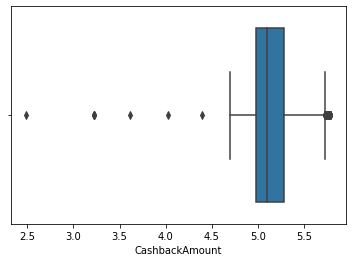

In [31]:
sns.boxplot(np.log(df['CashbackAmount']))

In [32]:
df['log_cashbackamount'] = np.log(df['CashbackAmount'])

In [33]:
df.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1     9.0                Phone         1              8.0   
2      1     9.0                Phone         1             30.0   
3      1     0.0                Phone         3             15.0   
4      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  log_cashbackamount  
0                5.0          159.93            5.074736  
1                0.0          120.90            4.794964  
2                3.0          120.28            4.789822  
3                3.0          134.07            4.898362  
4                3.0          129.60            4.864453

In [34]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [35]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [36]:
#mobile phone and phones should be combined into a single category
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Mobile Phone':'Phone'})

In [37]:
# value counts for preferred login device after replacement
df['PreferredLoginDevice'].value_counts()

Phone       3996
Computer    1634
Name: PreferredLoginDevice, dtype: int64

In [38]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [39]:
#cod & cash on delivery, credit card & cc, e wallet & upi are same categoies so they can be merged together
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'Credit Card':'CC', 'Cash on Delivery':'COD','E wallet':'UPI', 'Debit Card':'DC'})

In [40]:
df['PreferredPaymentMode'].value_counts()

DC     2314
CC     1774
UPI    1028
COD     514
Name: PreferredPaymentMode, dtype: int64

In [41]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [42]:
# we should combine mobile phone and mobile together
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile Phone':'Mobile', 'Laptop & Accessory':'Laptop_adons'})

In [43]:
df['PreferedOrderCat'].value_counts()

Mobile          2080
Laptop_adons    2050
Fashion          826
Grocery          410
Others           264
Name: PreferedOrderCat, dtype: int64

In [44]:
df['MaritalStatus'].value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [45]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [46]:
# dummy encoding for the categorical variables. We use this over Label Encoding because we are dealing with Nominal Data not Ordinal Data

In [47]:
df = pd.get_dummies(df, columns=cat, drop_first=True)

In [48]:
df.head()

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0      1     4.0         3              6.0             3.0   
1      1     9.0         1              8.0             3.0   
2      1     9.0         1             30.0             2.0   
3      1     0.0         3             15.0             2.0   
4      1     0.0         1             12.0             3.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_COD  \
0                         11.0  ...                         0   
1                         15.0  ...                         0   
2                         14.0  ...                         0   
3                         23.0  ...                         0   
4                         11.0  ...                         0   

   PreferredPaymentMode_DC  PreferredPaymentMode_UPI  Gender_Male  \
0                        1                         0            0   
1                        0                         1            1   
2                        1                         0            1   
3                        1                         0            1   
4                        0                         0            1   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop_adons  \
0                         0                              1   
1                         0                              0   
2                         0                              0   
3                         0                              1   
4                         0                              0   

   PreferedOrderCat_Mobile  PreferedOrderCat_Others  MaritalStatus_Married  \
0                        0                        0                      0   
1                        1                        0                      0   
2                        1                        0                      0   
3                        0                        0                      0   
4                        1                        0                      0   

   MaritalStatus_Single  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 26 columns]

In [49]:
df.shape

(5630, 26)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 26 columns):
Churn                            5630 non-null int64
Tenure                           5630 non-null float64
CityTier                         5630 non-null int64
WarehouseToHome                  5630 non-null float64
HourSpendOnApp                   5630 non-null float64
NumberOfDeviceRegistered         5630 non-null int64
SatisfactionScore                5630 non-null int64
NumberOfAddress                  5630 non-null int64
Complain                         5630 non-null int64
OrderAmountHikeFromlastYear      5630 non-null float64
CouponUsed                       5630 non-null float64
OrderCount                       5630 non-null float64
DaySinceLastOrder                5630 non-null float64
CashbackAmount                   5630 non-null float64
log_cashbackamount               5630 non-null float64
PreferredLoginDevice_Phone       5630 non-null uint8
PreferredPaymentMode_COD   

# 9. Checking for Highly Correlated Variables

In [62]:
# we want to check the correlations of all the variables including the dummy variables

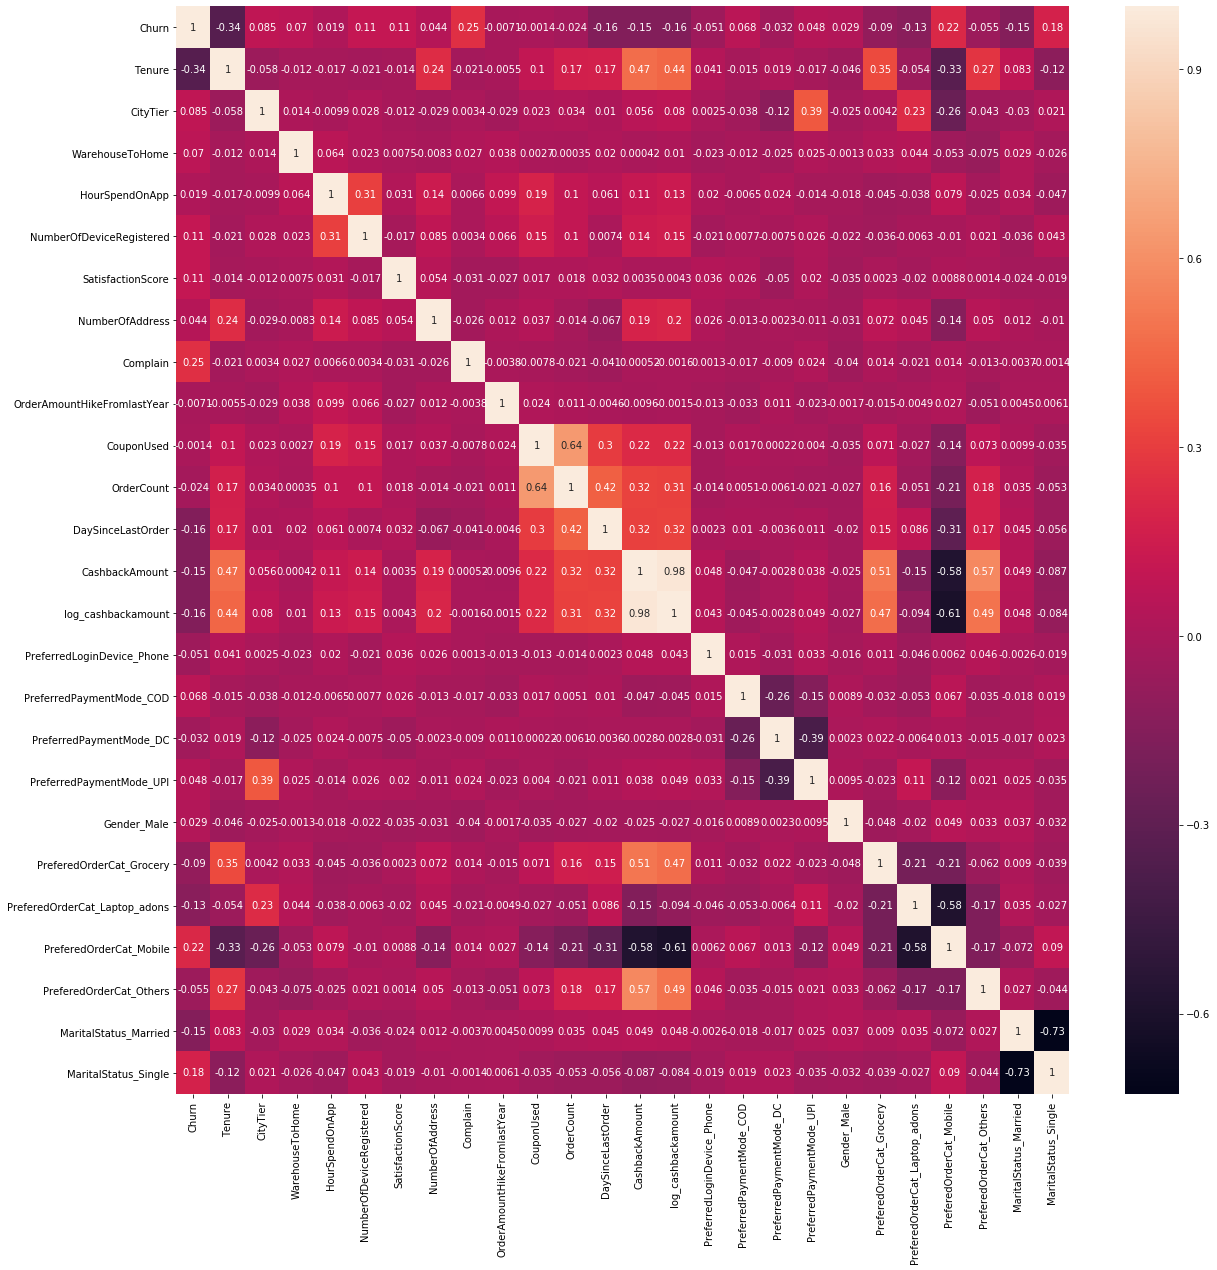

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.savefig("Heatmap After Data Encoding.jpg")

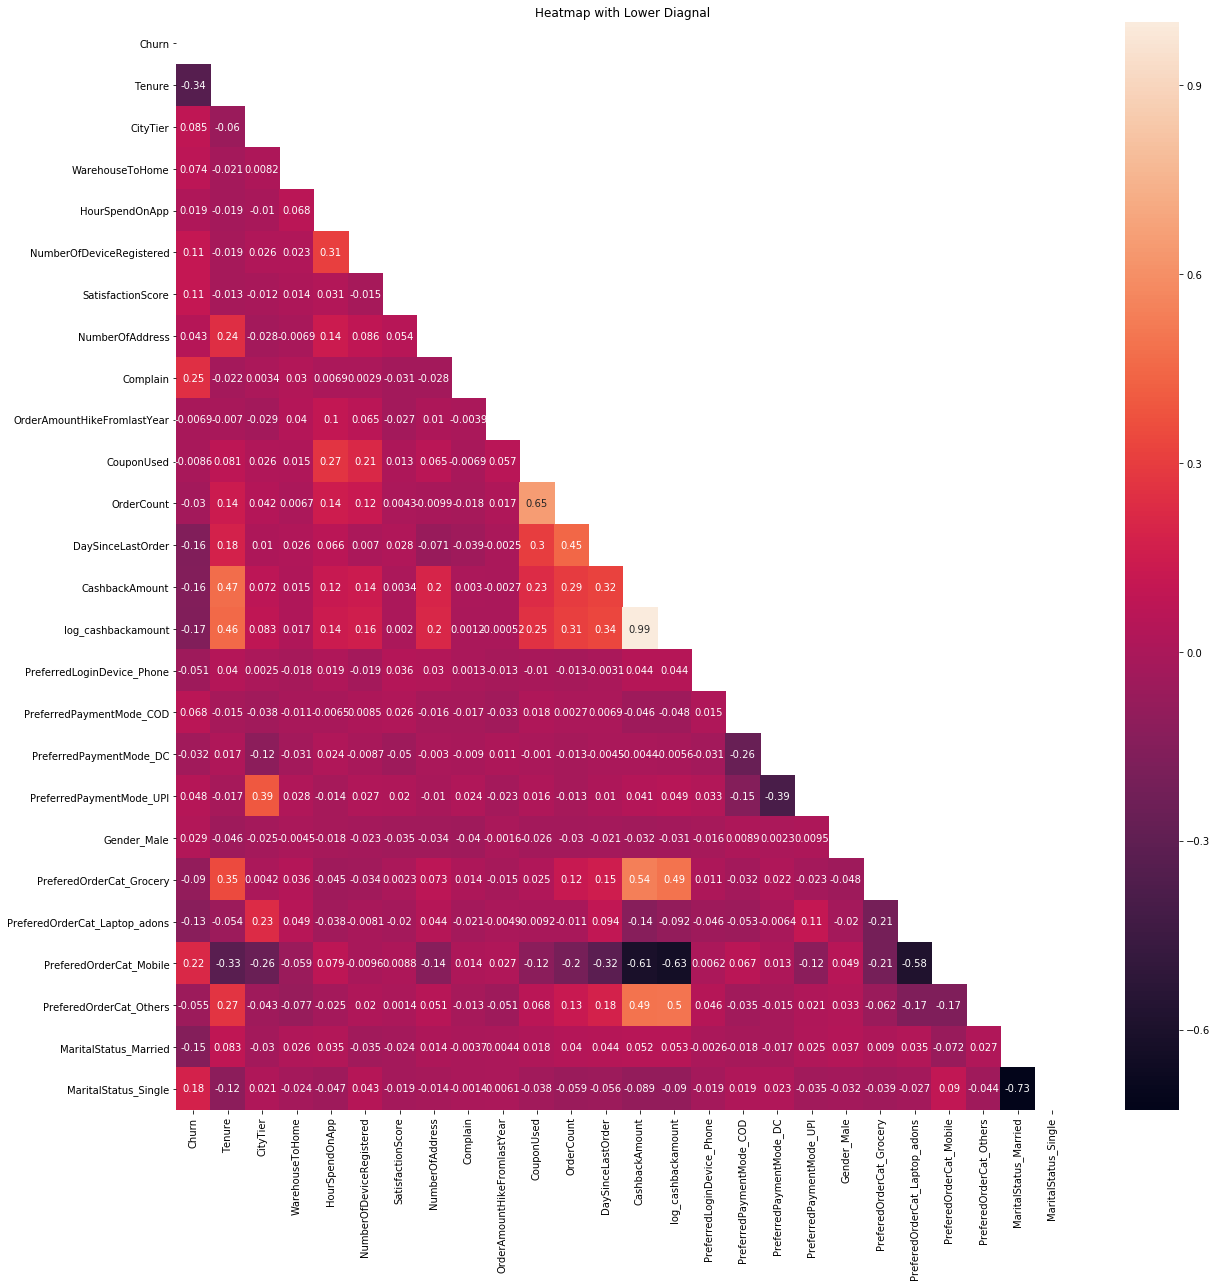

In [92]:
plt.figure(figsize=(20,20))

corr= df.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)

plt.title('Heatmap with Lower Diagnal')
plt.savefig('HeatMap with Lower Diagonal.jpg')

In [66]:
# we can see that there are some features which are highly correlated. 

# 10. Outlier Treatment 

In [51]:
num.append('log_cashbackamount')
num.remove('Churn')

In [52]:
num

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'log_cashbackamount']

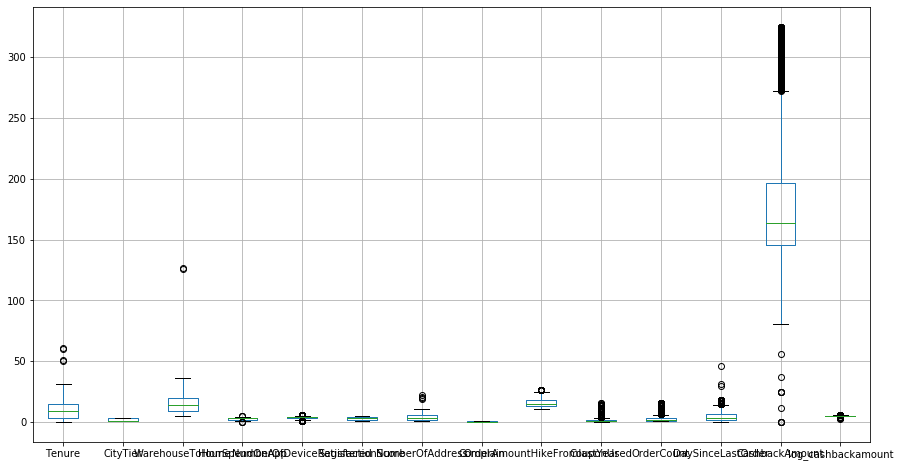

In [53]:
plt.figure(figsize =(15,8))
df[num].boxplot()

In [54]:
# there are significant number of outliers so we need to treat them.
# the outliers will be treated by capping the values to IQR

In [55]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR) 
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [56]:
for column in df[num].columns:
    lr,ur=remove_outliers(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

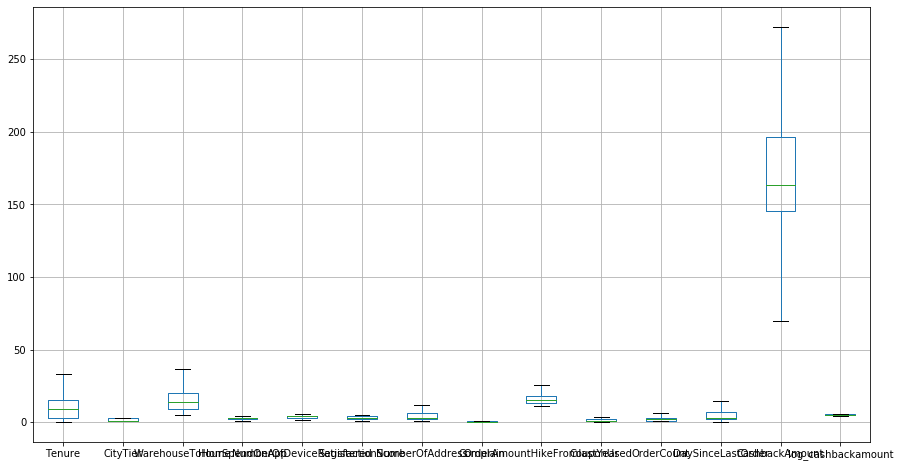

In [57]:
plt.figure(figsize =(15,8))
df[num].boxplot()

# 11. Checking The Target Class

In [58]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

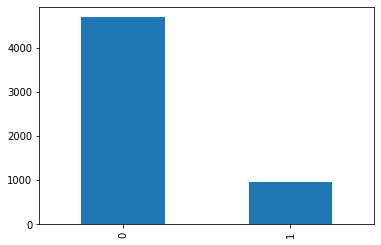

In [59]:
df['Churn'].value_counts().plot(kind='bar')

In [60]:
print("Percentage of 0's",round(df.Churn.value_counts().values[0]/df.Churn.count()*100,2),'%')
print("Percentage of 1's",round(df.Churn.value_counts().values[1]/df.Churn.count()*100,2),'%')

Percentage of 0's 83.16 %
Percentage of 1's 16.84 %


In [61]:
# we can see that the dataset is imbalanced.
# the target class is approx 17%
# since the target class is over 10%, we don't need to emplot SMOTE analysis

# 12. Data Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
Y = MinMaxScaler()
df2 = Y.fit_transform(df)
df2

array([[1.        , 0.12121212, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.27272727, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.27272727, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.03030303, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.6969697 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.24242424, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [64]:
df2 = pd.DataFrame(df2, index=df.index, columns=df.columns)
df2.head()

Churn    Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    1.0  0.121212       1.0         0.031746           0.625   
1    1.0  0.272727       0.0         0.095238           0.625   
2    1.0  0.272727       0.0         0.793651           0.375   
3    1.0  0.000000       1.0         0.317460           0.375   
4    1.0  0.000000       0.0         0.222222           0.625   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                     0.375               0.25         0.727273       1.0   
1                     0.625               0.50         0.545455       1.0   
2                     0.625               0.50         0.454545       1.0   
3                     0.625               1.00         0.636364       0.0   
4                     0.375               1.00         0.181818       0.0   

   OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_COD  \
0                     0.000000  ...                       0.0   
1                     0.275862  ...                       0.0   
2                     0.206897  ...                       0.0   
3                     0.827586  ...                       0.0   
4                     0.000000  ...                       0.0   

   PreferredPaymentMode_DC  PreferredPaymentMode_UPI  Gender_Male  \
0                      1.0                       0.0          0.0   
1                      0.0                       1.0          1.0   
2                      1.0                       0.0          1.0   
3                      1.0                       0.0          1.0   
4                      0.0                       0.0          1.0   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop_adons  \
0                       0.0                            1.0   
1                       0.0                            0.0   
2                       0.0                            0.0   
3                       0.0                            1.0   
4                       0.0                            0.0   

   PreferedOrderCat_Mobile  PreferedOrderCat_Others  MaritalStatus_Married  \
0                      0.0                      0.0                    0.0   
1                      1.0                      0.0                    0.0   
2                      1.0                      0.0                    0.0   
3                      0.0                      0.0                    0.0   
4                      1.0                      0.0                    0.0   

   MaritalStatus_Single  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0  

[5 rows x 26 columns]

In [65]:
df2.drop('CashbackAmount', axis=1, inplace=True)

In [66]:
df2.to_csv('excel.csv',index=False)

# 13. K-Means Clustering

In [67]:
from sklearn.cluster import KMeans

In [68]:
wss = []

for i in range(1,8):
    KM = KMeans(n_clusters=i)
    KM.fit(df2)
    wss.append(KM.inertia_)

In [69]:
wss

[18445.993364030415,
 16308.54504310248,
 15054.042770861266,
 14242.347103097458,
 13629.105588822003,
 12992.850064874576,
 12664.708067109079]

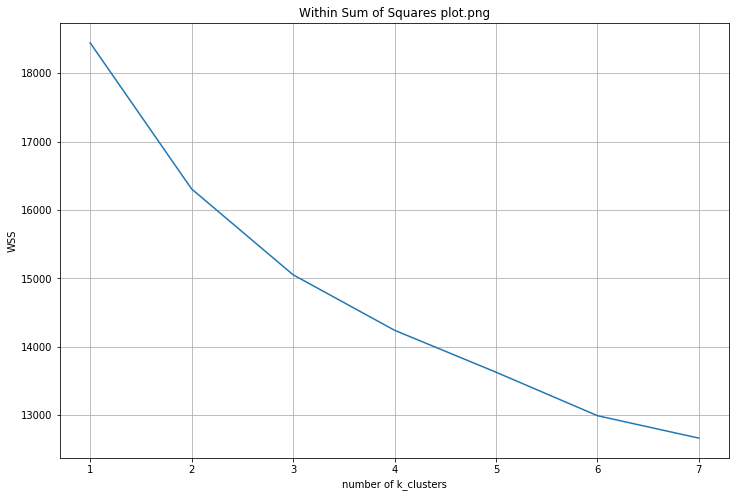

In [70]:
plt.figure(figsize=(12,8))
plt.plot(range(1,8), wss)
plt.title('Within Sum of Squares plot.png')
plt.grid()
plt.savefig('q1_Within Sum of Squares plot.jpg')
plt.ylabel('WSS')
plt.xlabel('number of k_clusters')
plt.show()

In [71]:
# we can see an the elbow at k=2

In [72]:
#Performing k-means with 2 clusters
km = KMeans(n_clusters=2, random_state=1)
km.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [73]:
labels1 = km.labels_
labels1

array([0, 1, 1, ..., 0, 0, 0])

In [74]:
df2['k_cluster'] = labels1

In [75]:
df2.head()

Churn    Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    1.0  0.121212       1.0         0.031746           0.625   
1    1.0  0.272727       0.0         0.095238           0.625   
2    1.0  0.272727       0.0         0.793651           0.375   
3    1.0  0.000000       1.0         0.317460           0.375   
4    1.0  0.000000       0.0         0.222222           0.625   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                     0.375               0.25         0.727273       1.0   
1                     0.625               0.50         0.545455       1.0   
2                     0.625               0.50         0.454545       1.0   
3                     0.625               1.00         0.636364       0.0   
4                     0.375               1.00         0.181818       0.0   

   OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_DC  \
0                     0.000000  ...                      1.0   
1                     0.275862  ...                      0.0   
2                     0.206897  ...                      1.0   
3                     0.827586  ...                      1.0   
4                     0.000000  ...                      0.0   

   PreferredPaymentMode_UPI  Gender_Male  PreferedOrderCat_Grocery  \
0                       0.0          0.0                       0.0   
1                       1.0          1.0                       0.0   
2                       0.0          1.0                       0.0   
3                       0.0          1.0                       0.0   
4                       0.0          1.0                       0.0   

   PreferedOrderCat_Laptop_adons  PreferedOrderCat_Mobile  \
0                            1.0                      0.0   
1                            0.0                      1.0   
2                            0.0                      1.0   
3                            1.0                      0.0   
4                            0.0                      1.0   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  \
0                      0.0                    0.0                   1.0   
1                      0.0                    0.0                   1.0   
2                      0.0                    0.0                   1.0   
3                      0.0                    0.0                   1.0   
4                      0.0                    0.0                   1.0   

   k_cluster  
0          0  
1          1  
2          1  
3          0  
4          1  

[5 rows x 26 columns]

In [76]:
df2.to_csv('excel.csv',index=False)

# 14. Cluster Profiling

In [77]:
df2.k_cluster.value_counts().sort_index()

0    3539
1    2091
Name: k_cluster, dtype: int64

In [78]:
pd.set_option('display.max_columns', None)

In [79]:
clust_profile1=df2
clust_profile1=clust_profile1.groupby('k_cluster').mean()
clust_profile1['Freq']=df2.k_cluster.value_counts().sort_index()
clust_profile1

Churn    Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
k_cluster                                                                  
0          0.103702  0.369827  0.418197         0.345869        0.597838   
1          0.277857  0.199615  0.173601         0.315092        0.626973   

           NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
k_cluster                                                                 
0                          0.550014           0.514058         0.315986   
1                          0.546927           0.521162         0.250424   

           Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
k_cluster                                                                  
0          0.279740                     0.317545    0.441368    0.358350   
1          0.293639                     0.330035    0.361071    0.212339   

           DaySinceLastOrder  log_cashbackamount  PreferredLoginDevice_Phone  \
k_cluster                                                                      
0                   0.363964            0.612367                    0.708675   
1                   0.206435            0.339550                    0.711621   

           PreferredPaymentMode_COD  PreferredPaymentMode_DC  \
k_cluster                                                      
0                          0.075728                 0.405482   
1                          0.117647                 0.420373   

           PreferredPaymentMode_UPI  Gender_Male  PreferedOrderCat_Grocery  \
k_cluster                                                                    
0                          0.219836     0.581238                  0.115852   
1                          0.119560     0.634625                  0.000000   

           PreferedOrderCat_Laptop_adons  PreferedOrderCat_Mobile  \
k_cluster                                                           
0                                0.57926                 0.000000   
1                                0.00000                 0.994739   

           PreferedOrderCat_Others  MaritalStatus_Married  \
k_cluster                                                   
0                         0.074597                0.55948   
1                         0.000000                0.48111   

           MaritalStatus_Single  Freq  
k_cluster                              
0                      0.284826  3539  
1                      0.376853  2091

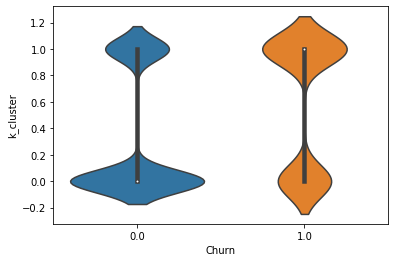

In [80]:
sns.violinplot(df2['Churn'], df2['k_cluster'])

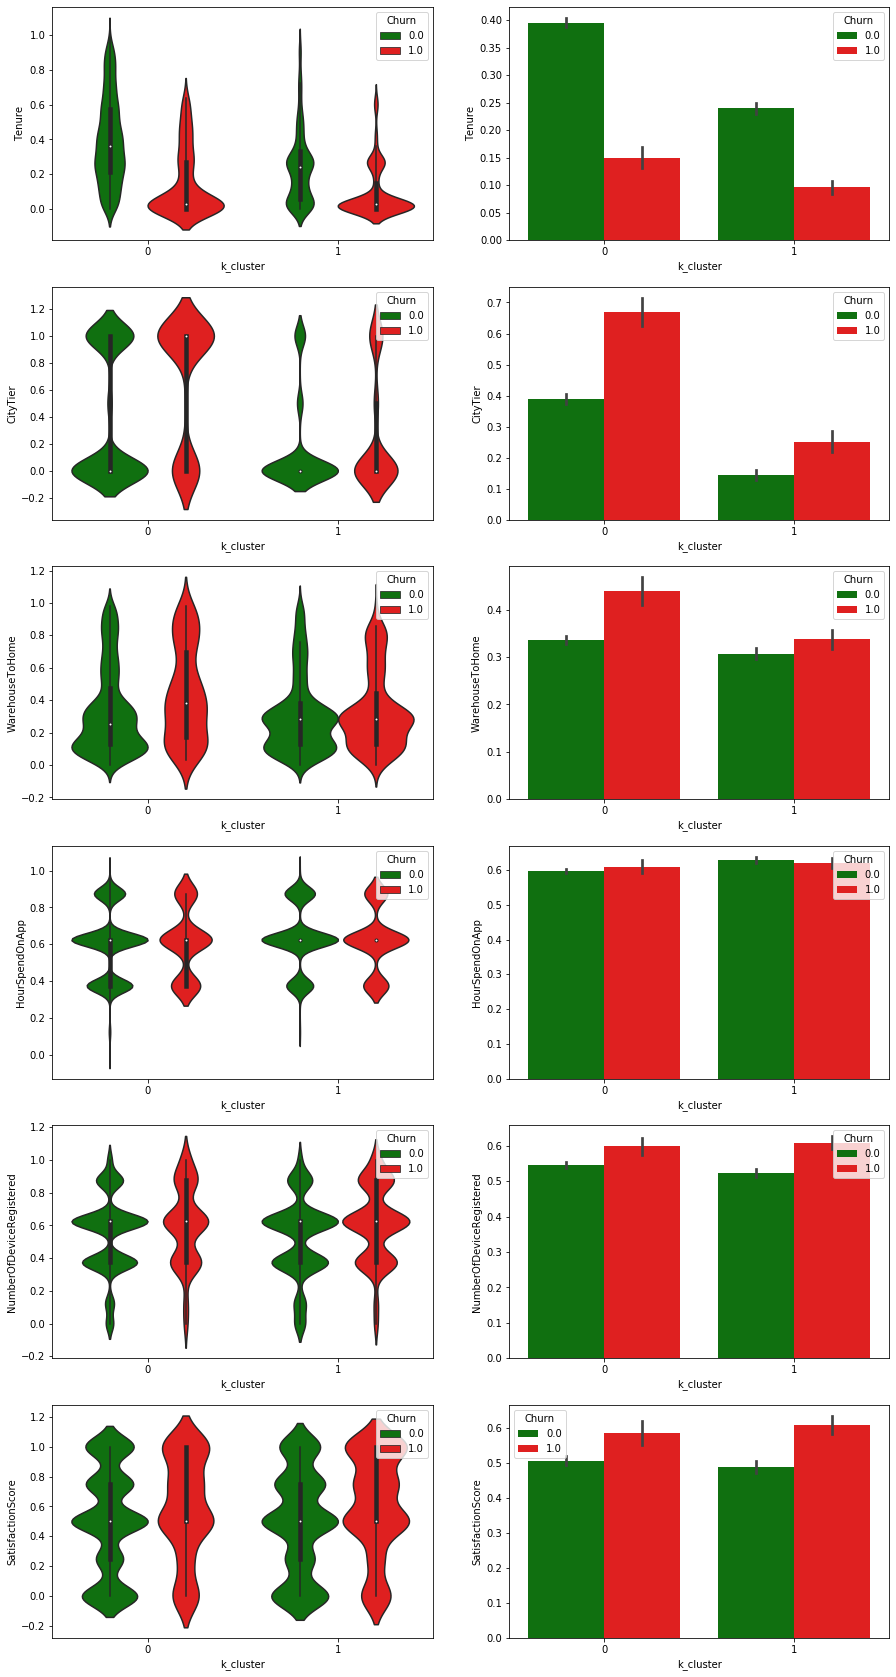

In [81]:
fig, axes = plt.subplots(nrows = 6, ncols=2)
fig.set_size_inches(15,30)

a = sns.violinplot(df2['k_cluster'], df2['Tenure'], hue=df2['Churn'],palette =['g','r'],ax = axes[0][0])
b = sns.barplot(df2['k_cluster'], df2['Tenure'],hue=df2['Churn'] ,ax = axes[0][1], palette =['g','r'])

a = sns.violinplot(df2['k_cluster'], df2['CityTier'],hue=df2['Churn'], palette =['g','r'],ax = axes[1][0])
b = sns.barplot(df2['k_cluster'], df2['CityTier'],hue=df2['Churn'], palette =['g','r'],ax = axes[1][1])

a = sns.violinplot(df2['k_cluster'], df2['WarehouseToHome'], hue=df2['Churn'],palette =['g','r'], ax = axes[2][0])
b = sns.barplot(df2['k_cluster'], df2['WarehouseToHome'],hue=df2['Churn'], palette =['g','r'], ax = axes[2][1])

a = sns.violinplot(df2['k_cluster'], df2['HourSpendOnApp'], hue=df2['Churn'],palette =['g','r'],ax = axes[3][0])
b = sns.barplot(df2['k_cluster'], df2['HourSpendOnApp'],hue=df2['Churn'], palette =['g','r'],ax = axes[3][1])

a = sns.violinplot(df2['k_cluster'], df2['NumberOfDeviceRegistered'], hue=df2['Churn'],palette =['g','r'],ax = axes[4][0])
b = sns.barplot(df2['k_cluster'], df2['NumberOfDeviceRegistered'],hue=df2['Churn'], palette =['g','r'],ax = axes[4][1])

a = sns.violinplot(df2['k_cluster'], df2['SatisfactionScore'], hue=df2['Churn'],palette =['g','r'],ax = axes[5][0])
b = sns.barplot(df2['k_cluster'], df2['SatisfactionScore'],hue=df2['Churn'], palette =['g','r'],ax = axes[5][1])


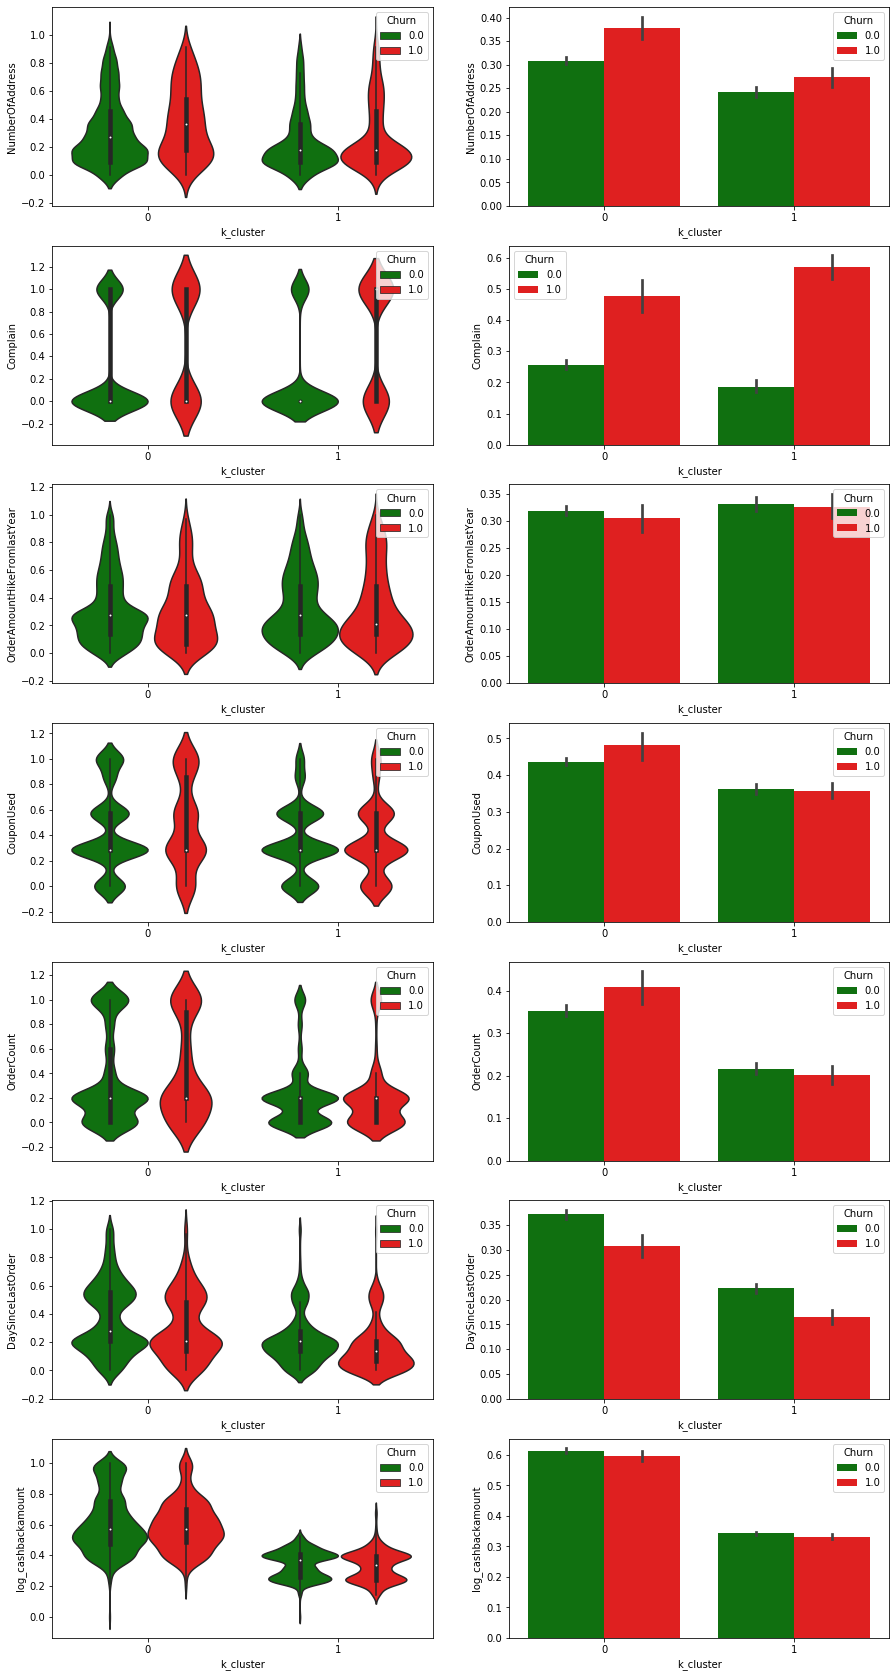

In [82]:
fig, axes = plt.subplots(nrows =7,ncols=2)
fig.set_size_inches(15,30)

a = sns.violinplot(df2['k_cluster'], df2['NumberOfAddress'], hue=df2['Churn'],palette =['g','r'],ax = axes[0][0])
b = sns.barplot(df2['k_cluster'], df2['NumberOfAddress'],hue=df2['Churn'], palette =['g','r'],ax = axes[0][1])

a = sns.violinplot(df2['k_cluster'], df2['Complain'], df2['Churn'],palette =['g','r'],ax = axes[1][0])
b = sns.barplot(df2['k_cluster'], df2['Complain'],hue=df2['Churn'], palette =['g','r'],ax = axes[1][1])

a = sns.violinplot(df2['k_cluster'], df2['OrderAmountHikeFromlastYear'], df2['Churn'],palette =['g','r'],ax = axes[2][0])
b = sns.barplot(df2['k_cluster'], df2['OrderAmountHikeFromlastYear'],hue=df2['Churn'], palette =['g','r'],ax = axes[2][1])

a = sns.violinplot(df2['k_cluster'], df2['CouponUsed'], df2['Churn'],palette =['g','r'],ax = axes[3][0])
b = sns.barplot(df2['k_cluster'], df2['CouponUsed'],hue=df2['Churn'], palette =['g','r'],ax = axes[3][1])

a = sns.violinplot(df2['k_cluster'], df2['OrderCount'], df2['Churn'],palette =['g','r'],ax = axes[4][0])
b = sns.barplot(df2['k_cluster'], df2['OrderCount'],hue=df2['Churn'], palette =['g','r'],ax = axes[4][1])

a = sns.violinplot(df2['k_cluster'], df2['DaySinceLastOrder'],hue= df2['Churn'],palette =['g','r'],ax = axes[5][0])
b = sns.barplot(df2['k_cluster'], df2['DaySinceLastOrder'],hue=df2['Churn'], palette =['g','r'],ax = axes[5][1])

a = sns.violinplot(df2['k_cluster'], df2['log_cashbackamount'], hue=df2['Churn'],palette =['g','r'],ax = axes[6][0])                             
b = sns.barplot(df2['k_cluster'], df2['log_cashbackamount'], hue=df2['Churn'], palette =['g','r'], ax=axes[6][1])